In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Movies_final_ML.csv")

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               87585 non-null  int64  
 1   imdbId                87585 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  float64
 4   status                86493 non-null  object 
 5   release_date          87455 non-null  object 
 6   revenue               86493 non-null  float64
 7   runtime               86493 non-null  float64
 8   adult                 86493 non-null  object 
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  float64
 11  homepage              17774 non-null  object 
 12  original_language     86493 non-null  object 
 13  original_title        86493 non-null  object 
 14  overview              85667 non-null  object 
 15  popularity         

,movieId,imdbId,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,tagline,production_companies,production_countries,spoken_languages,keywords,title,genres,Directors,Cast,StarActors
0,1,tt0114709,7.971,17152.0,Released,1995-10-30,394400000.0,81.0,False,/3Rfvhy1Nl6sSGJwyjb0QiZzZYlB.jpg,...,Hang on for the comedy that goes to infinity a...,Pixar,United States of America,English,"rescue, friendship, mission, martial arts, jea...",Toy Story,"Animation, Adventure, Family, Comedy",John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Tom Hanks, Tim Allen, Don Rickles"
1,2,tt0113497,7.239,9833.0,Released,1995-12-15,262821940.0,104.0,False,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,...,Roll the dice and unleash the excitement!,"TriStar Pictures, Interscope Communications, T...",United States of America,"English, French","giant insect, board game, disappearance, jungl...",Jumanji,"Adventure, Fantasy, Family",Joe Johnston,"Robin Williams, Kirsten Dunst, Bonnie Hunt, Jo...","Robin Williams, Kirsten Dunst, Bonnie Hunt"
2,3,tt0113228,6.476,347.0,Released,1995-12-22,71500000.0,101.0,False,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,...,Still Yelling. Still Fighting. Still Ready for...,"Lancaster Gate, Warner Bros. Pictures",United States of America,English,"fishing, sequel, old man, best friend, wedding...",Grumpier Old Men,"Romance, Comedy",Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Walter Matthau, Jack Lemmon, Ann-Margret"
3,4,tt0114885,6.183,142.0,Released,1995-12-22,81452156.0,127.0,False,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,...,Friends are the people who let you be yourself...,20th Century Fox,United States of America,English,"based on novel or book, interracial relationsh...",Waiting to Exhale,"Comedy, Drama, Romance",Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...","Whitney Houston, Angela Bassett, Loretta Devine"
4,5,tt0113041,6.228,659.0,Released,1995-12-08,76594107.0,106.0,False,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,...,Just when his world is back to normal... he's ...,"Touchstone Pictures, Sandollar Productions",United States of America,English,"daughter, baby, parent child relationship, mid...",Father of the Bride Part II,"Comedy, Family",Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Steve Martin, Diane Keaton, Martin Short"


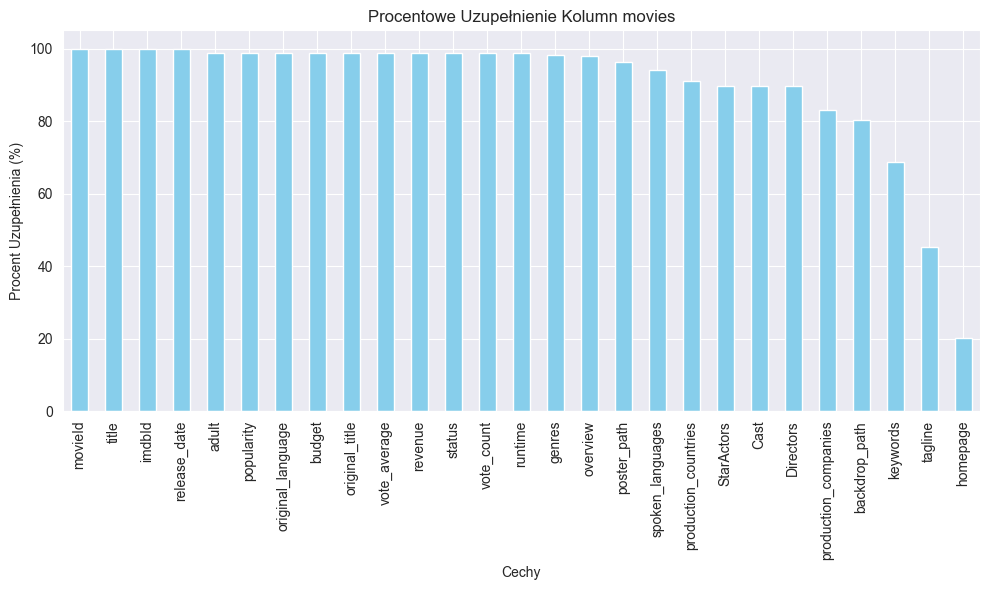

In [4]:
# Procentowe uzupełnienie danych Movies_final.csv

percentage_complete = df.notnull().mean() * 100

plt.figure(figsize=(10, 6))
percentage_complete.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Procentowe Uzupełnienie Kolumn movies')
plt.xlabel('Cechy')
plt.ylabel('Procent Uzupełnienia (%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

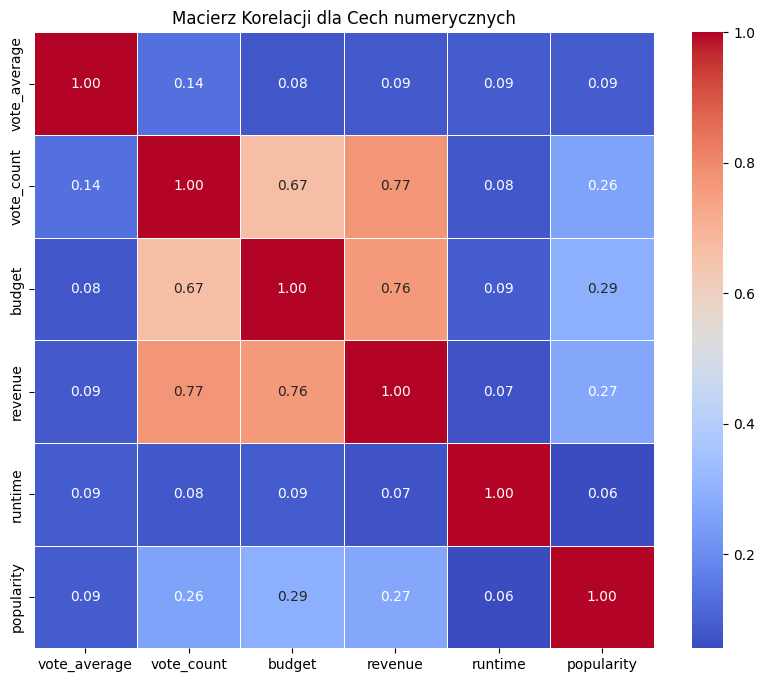

In [54]:
numeric_features = df[['vote_average','vote_count','budget', 'revenue', 'runtime', 'popularity']]
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz Korelacji dla Cech numerycznych')
plt.show()

In [18]:
df_basics = pd.read_csv(
    "title.basics.tsv.gz", 
    sep="\t", 
    dtype=str, 
    na_values="\\N", 
    usecols=["tconst", "titleType", "primaryTitle"]
)

In [19]:
df_name = pd.read_csv(
    "Basic_names_crew_dataset.gz",
    sep="\t",
    na_values="\\N",
    usecols=["nconst", "primaryName"]
)

In [20]:
df_crew = pd.read_csv(
    "Crew_dataset.gz",
    sep="\t",
    na_values="\\N",
    usecols=["tconst", "directors"]
)

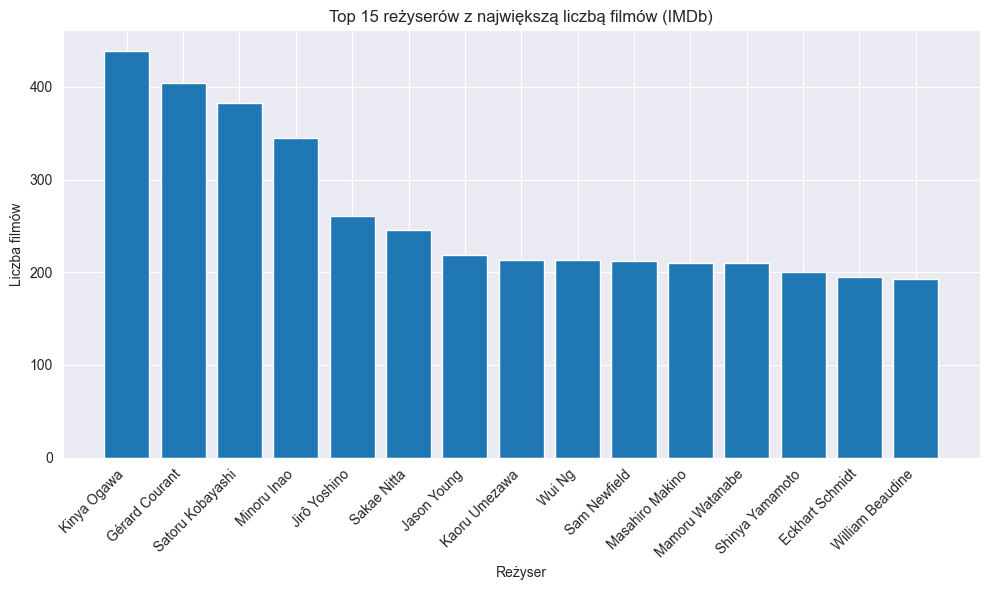

       nconst  title_count       primaryName
0   nm0644554          439       Kinya Ogawa
1   nm0183659          404    Gérard Courant
2   nm0462051          383  Satoru Kobayashi
3   nm0997109          345       Minoru Inao
4   nm1846347          261      Jirô Yoshino
5   nm0457554          246       Sakae Nitta
6   nm3248232          219       Jason Young
7   nm0383255          213     Kaoru Umezawa
8   nm0628860          213            Wui Ng
9   nm0627864          212      Sam Newfield
10  nm0538632          210   Masahiro Makino
11  nm0913835          210   Mamoru Watanabe
12  nm0945487          200   Shinya Yamamoto
13  nm0772905          195   Eckhart Schmidt
14  nm0064415          193  William Beaudine


In [21]:
# Tworzenie wstepnego wykresu dotyczacego Top15 rezyserow z najwieksza liczba filmow

df_crew = df_crew.dropna(subset=["directors"]).copy()
df_crew["directors"] = df_crew["directors"].str.split(",")
df_crew = df_crew.merge(df_basics, on="tconst", how="inner") 
df_crew = df_crew[df_crew["titleType"].isin(["movie","tvMovie"])].copy() # Potrzebujemy usunac seriale
df_crew = df_crew.explode("directors").rename(columns={"directors": "nconst"})

director_counts = df_crew.groupby("nconst")["tconst"].nunique()
director_counts = director_counts.sort_values(ascending=False)
top_n = director_counts.head(15)

df_top_directors = top_n.reset_index()  # zamiana series na DataFrame
df_top_directors.columns = ["nconst", "title_count"]
df_top_directors = df_top_directors.merge(df_name, on="nconst", how="left") # Imiona i nazwiska rezyserow

plt.figure(figsize=(10, 6))
plt.bar(df_top_directors["primaryName"], df_top_directors["title_count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Reżyser")
plt.ylabel("Liczba filmów")
plt.title("Top 15 reżyserów z największą liczbą filmów (IMDb)")
plt.tight_layout()

plt.show()
print(df_top_directors)

In [4]:
from wordcloud import WordCloud

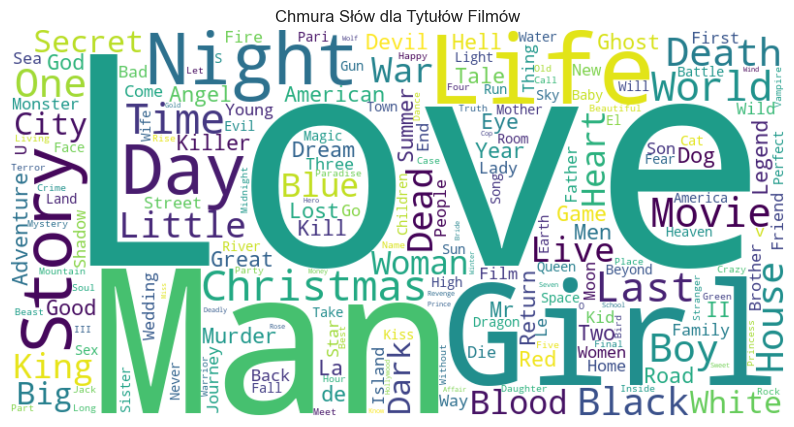

In [5]:
# Chmura słow dla title (w jezyku angielskim)

text = " ".join(title for title in df['title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura Słów dla Tytułów Filmów')
plt.show()


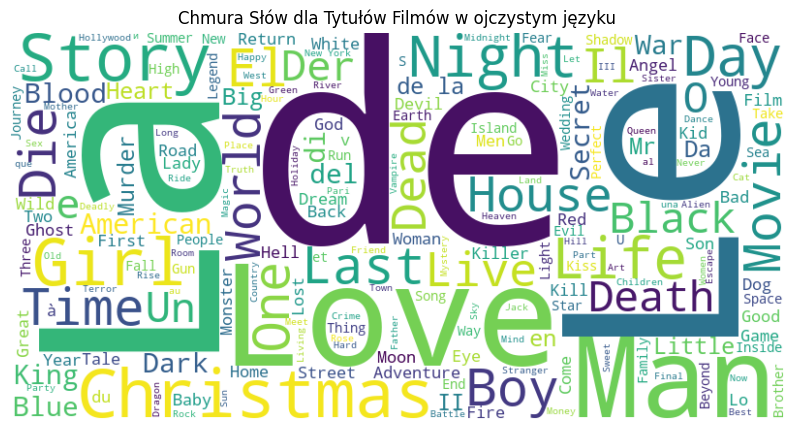

In [61]:
# Chmura słow dla title (tylko w orginalnym jezyku)

text = " ".join(title for title in df['original_title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura Słów dla Tytułów Filmów w ojczystym języku')
plt.show()

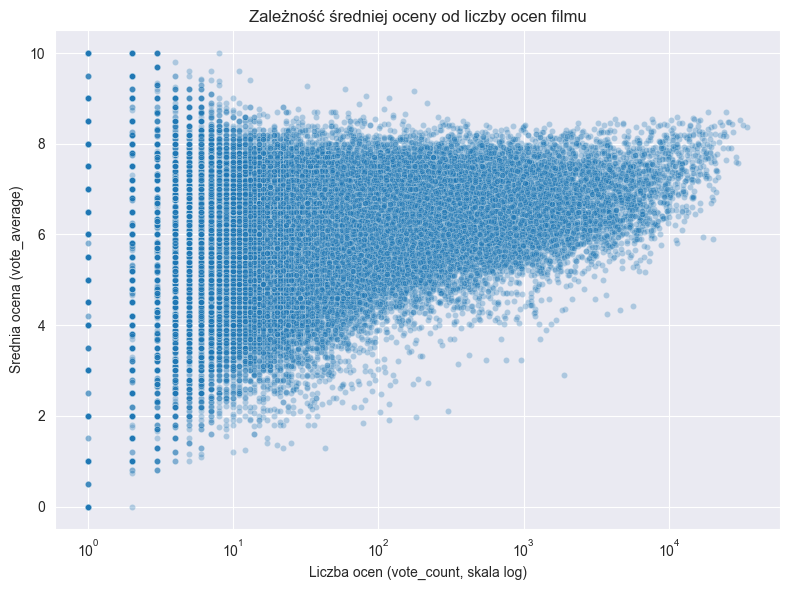

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="vote_count",
    y="vote_average",
    alpha=0.3,
    s=20
)
plt.xscale("log")
plt.xlabel("Liczba ocen (vote_count, skala log)")
plt.ylabel("Srednia ocena (vote_average)")
plt.title("Zależność średniej oceny od liczby ocen filmu")
plt.tight_layout()
plt.show()

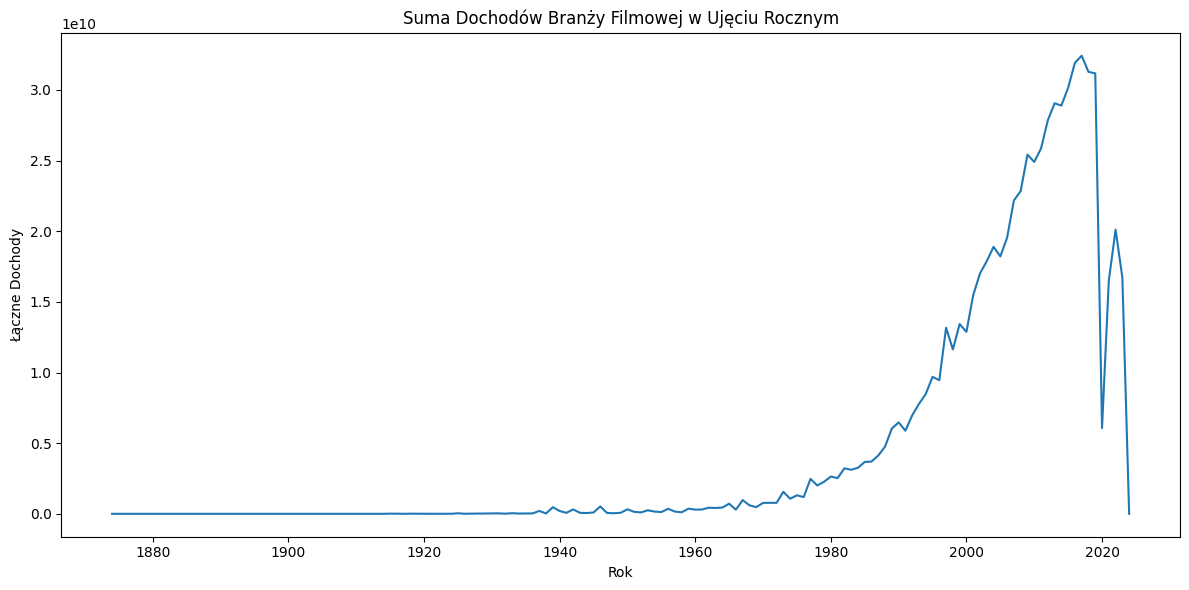

In [62]:
# Przychody z filmow rozdzielone na lata

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df = df.dropna(subset=['release_year'])

annual_revenue = df.groupby('release_year')['revenue'].sum()

plt.figure(figsize=(12, 6))
annual_revenue.plot(kind='line')
plt.title('Suma Dochodów Branży Filmowej w Ujęciu Rocznym')
plt.xlabel('Rok')
plt.ylabel('Łączne Dochody')
plt.tight_layout()
plt.show()

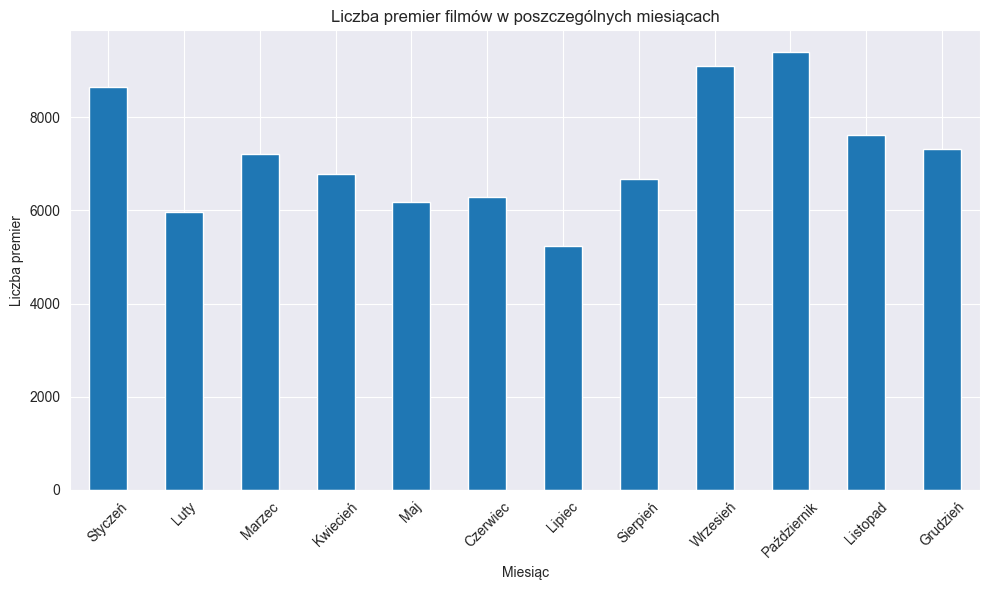

In [12]:
# Premiery filmów rozdzielone na miesiące

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = df['release_date'].dt.month
df = df.dropna(subset=['release_month'])

monthly_counts = df['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Liczba premier filmów w poszczególnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Liczba premier')

plt.xticks(range(12), 
           ['Styczeń','Luty','Marzec','Kwiecień','Maj','Czerwiec',
            'Lipiec','Sierpień','Wrzesień','Październik','Listopad','Grudzień'], 
           rotation=45)

plt.tight_layout()
plt.show()

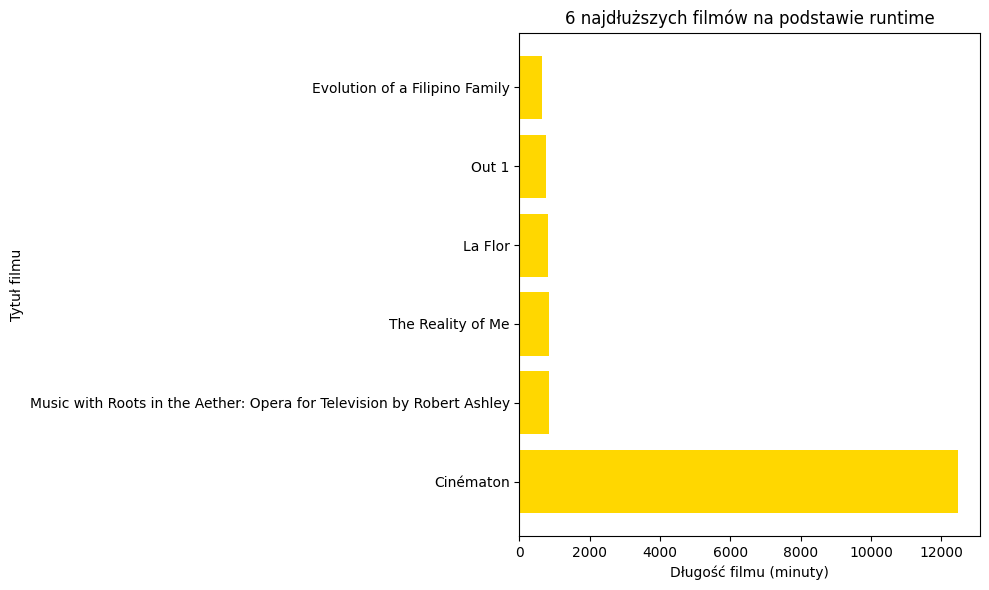

                                                   title  runtime
66246                                          Cinématon    12480
79741  Music with Roots in the Aether: Opera for Tele...      840
68711                                  The Reality of Me      840
39958                                            La Flor      803
26215                                              Out 1      743
38127                     Evolution of a Filipino Family      647


In [64]:
# Top 6 najdluzszych filmow opartych na runtime

df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")
df = df[df["runtime"] > 0] # Stosujemy tylko dla tego wykresu

df_longest = df.sort_values("runtime", ascending=False).head(6) 

plt.figure(figsize=(10, 6))
plt.barh(df_longest["title"], df_longest["runtime"], color="gold")
plt.xlabel("Długość filmu (minuty)")
plt.ylabel("Tytuł filmu")
plt.title("6 najdłuższych filmów na podstawie runtime")
plt.tight_layout()
plt.show()

print(df_longest[["title", "runtime"]])

C:\Users\matimathew\AppData\Local\Temp\ipykernel_11884\202396107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["release_year"] = df["release_year"].astype(int)
C:\Users\matimathew\AppData\Local\Temp\ipykernel_11884\202396107.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")


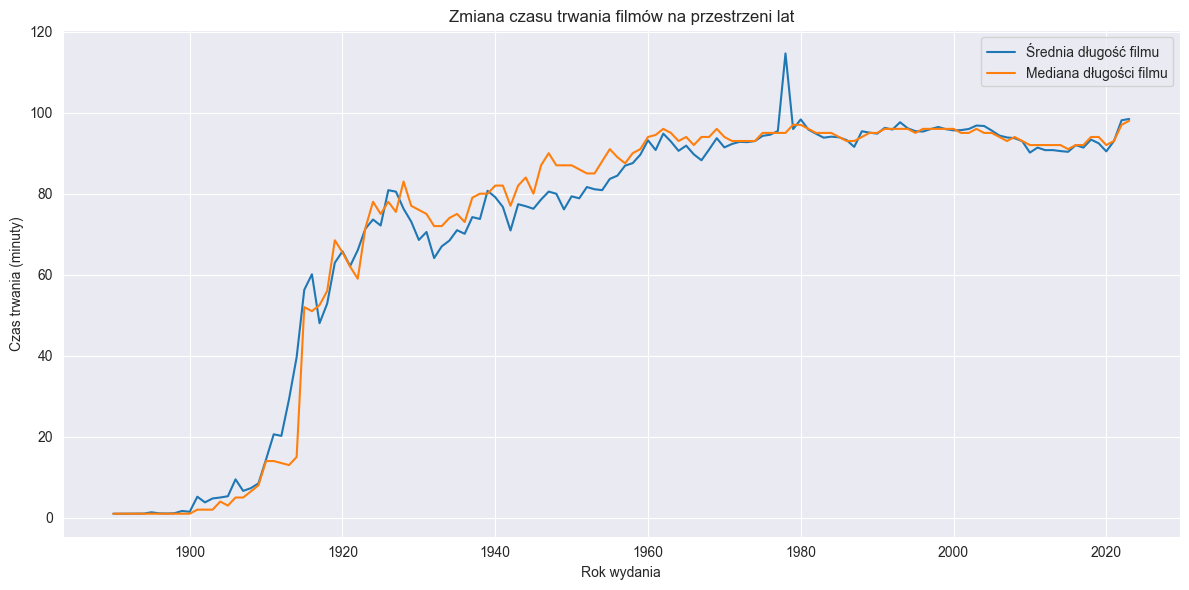

In [10]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

df = df.dropna(subset=["release_year", "runtime"])
df["release_year"] = df["release_year"].astype(int)
df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")
df = df.dropna(subset=["runtime"])

runtime_stats = (
    df.groupby("release_year")["runtime"]
      .agg(
        mean_runtime="mean",
        median_runtime="median",
        count="count"
      )
      .query("count >= 5")
      .reset_index()
)

plt.figure(figsize=(12, 6))
plt.plot(runtime_stats["release_year"],
         runtime_stats["mean_runtime"],
         label="Średnia długość filmu",
         color="C0")
plt.plot(runtime_stats["release_year"],
         runtime_stats["median_runtime"],
         label="Mediana długości filmu",
         color="C1")
plt.xlabel("Rok wydania")
plt.ylabel("Czas trwania (minuty)")
plt.title("Zmiana czasu trwania filmów na przestrzeni lat")
plt.legend()
plt.tight_layout()
plt.show()

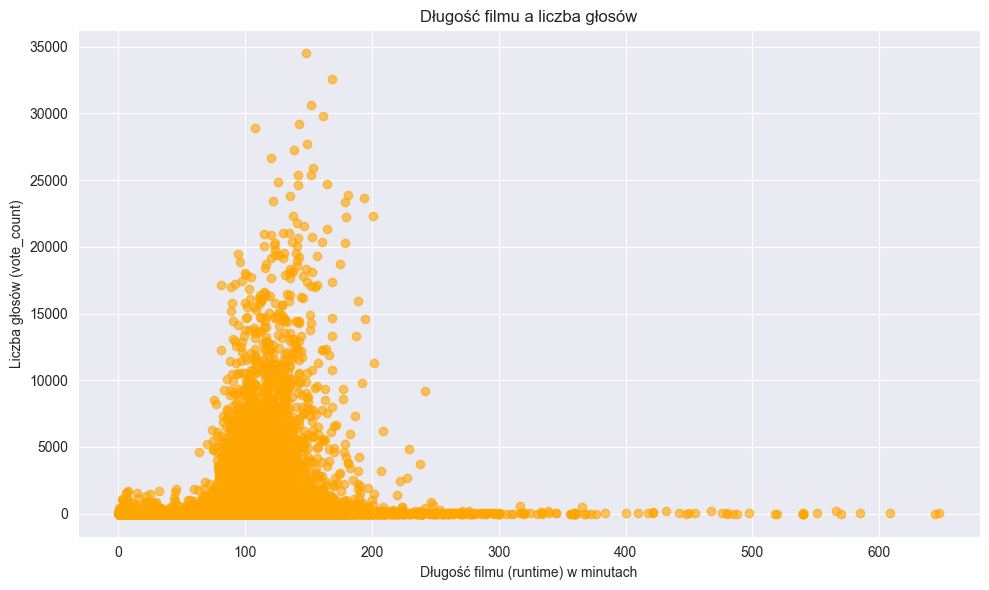

In [11]:
# Dlugosc filmu a jego liczba glosow

df_cleaned = df[df['runtime'] > 0]
df_cleaned = df_cleaned[df_cleaned['runtime'] <= 650]

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['runtime'], df_cleaned['vote_count'], alpha=0.6, color='orange')
plt.title('Długość filmu a liczba głosów')
plt.xlabel('Długość filmu (runtime) w minutach')
plt.ylabel('Liczba głosów (vote_count)')
plt.tight_layout()
plt.show()

In [66]:
df = pd.read_csv("Movies_final.csv") # Odswiezamy dataset

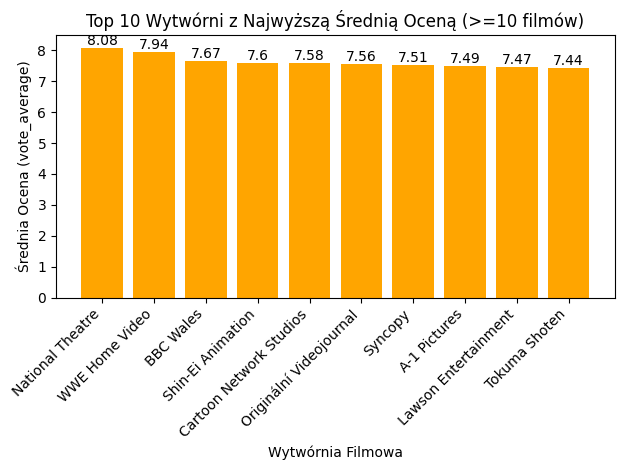

In [67]:
# Top10 wytworni wzgledem sredniej oceny ich filmow

def parse_production(companies_str):
    try:
        return [company.strip() for company in companies_str.split(',')]
    except:
        return []

df['prod_companies_list'] = df['production_companies'].apply(parse_production)
df_exploded = df.explode('prod_companies_list')
df_exploded = df_exploded.dropna(subset=['prod_companies_list'])

# Grupujemy do zliczenia sredniej oceny
grouped = df_exploded.groupby('prod_companies_list').agg(
    avg_vote=('vote_average', 'mean'),
    film_count=('prod_companies_list', 'count')
).reset_index()

grouped_filtered = grouped[grouped['film_count'] >= 10]
top_10 = grouped_filtered.nlargest(10, 'avg_vote')

bars = plt.bar(top_10['prod_companies_list'], top_10['avg_vote'], color='orange')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Wytwórni z Najwyższą Średnią Oceną (>=10 filmów)')
plt.xlabel('Wytwórnia Filmowa')
plt.ylabel('Średnia Ocena (vote_average)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

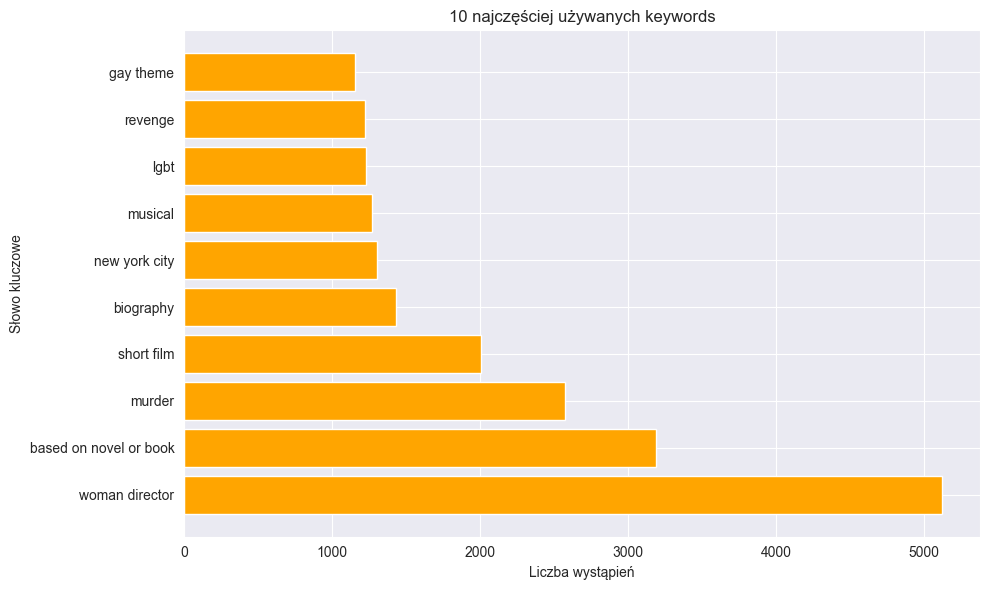

                      keyword  count
27428          woman director   5122
2061   based on novel or book   3186
16501                  murder   2572
22499              short film   2008
2488                biography   1435
17093           new york city   1302
16603                 musical   1267
14167                    lgbt   1229
20768                 revenge   1223
10193               gay theme   1158


In [14]:
# Analiza keyword i Top10 najczesciej uzywanych (zliczenie)

df['keywords'] = df['keywords'].astype(str)
df = df[df['keywords'] != 'nan']

df['keywords_list'] = df['keywords'].apply(lambda x: x.split(','))
all_keywords = [keyword.strip() for sublist in df['keywords_list'] for keyword in sublist]

keywords_df = pd.DataFrame(all_keywords, columns=['keyword'])
keyword_counts = keywords_df.groupby('keyword').size().reset_index(name='count')
top_keywords = keyword_counts.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_keywords['keyword'], top_keywords['count'], color='orange')
plt.xlabel("Liczba wystąpień")
plt.ylabel("Słowo kluczowe")
plt.title("10 najczęściej używanych keywords")
plt.tight_layout()

plt.show()
print(top_keywords)